In [1]:
! cp -r /content/drive/My\ Drive/machine_learning/ /content

In [28]:
import os
os.chdir("/content/machine_learning")

In [29]:
import cnn_models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from model_utils import ModelUtils, ModelAnalytics
from data_loader import FeatureDataset

plt.style.use('default')
drive_dir = "/content/drive/My Drive/machine_learning"
pth_dir = f"{drive_dir}/pths"
loss_dir = f"{drive_dir}/losses"

In [49]:
train_dataset = FeatureDataset("chroma_stft", "train")
validate_dataset = FeatureDataset("chroma_stft", "validate")
test_dataset = FeatureDataset("chroma_stft", "test")

criterion = nn.CrossEntropyLoss()

In [68]:
model = cnn_models.ChromaCNNFreq().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [69]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_freq_chroma_stft/epoch_0.pth
0min 10.1s, EPOCH 5/50, Loss: 366.65, Total time: 10.048, Transfer time: 0.6, Train time: 8.081
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_freq_chroma_stft/epoch_5.pth
0min 20.1s, EPOCH 10/50, Loss: 354.66, Total time: 10.017, Transfer time: 0.601, Train time: 8.05
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_freq_chroma_stft/epoch_10.pth
0min 30.1s, EPOCH 15/50, Loss: 344.69, Total time: 10.035, Transfer time: 0.594, Train time: 8.058
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_freq_chroma_stft/epoch_15.pth
0min 40.2s, EPOCH 20/50, Loss: 335.18, Total time: 10.054, Transfer time: 0.601, Train time: 8.056
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_freq_chroma_stft/epoch_20.pth
0min 50.2s, EPOCH 25/50, Loss: 321.61, Total time: 10.033, Transfer ti

Evaluating pths for epochs:  0 (0min 1.3s), 5 (0min 2.5s), 10 (0min 3.8s), 15 (0min 5.1s), 20 (0min 6.3s), 25 (0min 7.6s), 30 (0min 8.9s), 35 (0min 10.1s), 40 (0min 11.4s), 45 (0min 12.6s), 50 (0min 13.9s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.5728 at epoch 50
Maximum validate accuracy: 0.3887 at epoch 40
Maximum test accuracy: 0.3562 at epoch 20

AT EPOCH 20
Macro Test AUC: 0.7082, Accuracy: 0.3562

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.7423, Accuracy of 0.32
 - Experimental: AUC of 0.4854, Accuracy of 0.01
 - Folk: AUC of 0.7044, Accuracy of 0.3
 - Hip-Hop: AUC of 0.9131, Accuracy of 0.61
 - Instrumental: AUC of 0.8244, Accuracy of 0.33
 - International: AUC of 0.7067, Accuracy of 0.36
 - Pop: AUC of 0.4139, Accuracy of 0.13
 - Rock: AUC of 0.8676, Accuracy of 0.79


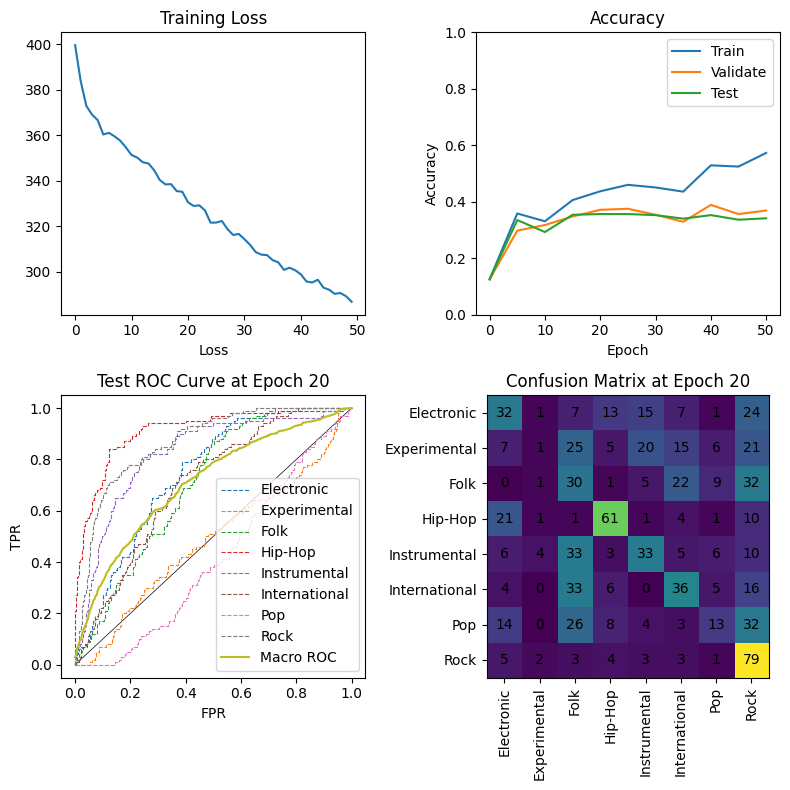

In [70]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)

In [71]:
model = cnn_models.ChromaCNNTemporal().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [72]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_temporal_chroma_stft/epoch_0.pth
0min 8.7s, EPOCH 5/50, Loss: 360.75, Total time: 8.68, Transfer time: 0.598, Train time: 6.728
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_temporal_chroma_stft/epoch_5.pth
0min 17.4s, EPOCH 10/50, Loss: 337.51, Total time: 8.634, Transfer time: 0.594, Train time: 6.696
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_temporal_chroma_stft/epoch_10.pth
0min 26.0s, EPOCH 15/50, Loss: 300.03, Total time: 8.651, Transfer time: 0.596, Train time: 6.698
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_temporal_chroma_stft/epoch_15.pth
0min 34.9s, EPOCH 20/50, Loss: 244.52, Total time: 8.801, Transfer time: 0.606, Train time: 6.806
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_temporal_chroma_stft/epoch_20.pth
0min 43.6s, EPOCH 25/50, Loss: 179.28, Total time: 8.

Evaluating pths for epochs:  0 (0min 1.1s), 5 (0min 2.3s), 10 (0min 3.4s), 15 (0min 4.6s), 20 (0min 5.8s), 25 (0min 6.9s), 30 (0min 8.1s), 35 (0min 9.2s), 40 (0min 10.4s), 45 (0min 11.6s), 50 (0min 12.7s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.9135 at epoch 40
Maximum validate accuracy: 0.3537 at epoch 20
Maximum test accuracy: 0.3438 at epoch 20

AT EPOCH 20
Macro Test AUC: 0.684, Accuracy: 0.3438

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.7448, Accuracy of 0.53
 - Experimental: AUC of 0.4752, Accuracy of 0.01
 - Folk: AUC of 0.6203, Accuracy of 0.05
 - Hip-Hop: AUC of 0.8966, Accuracy of 0.67
 - Instrumental: AUC of 0.768, Accuracy of 0.34
 - International: AUC of 0.6968, Accuracy of 0.31
 - Pop: AUC of 0.4873, Accuracy of 0.07
 - Rock: AUC of 0.7741, Accuracy of 0.77


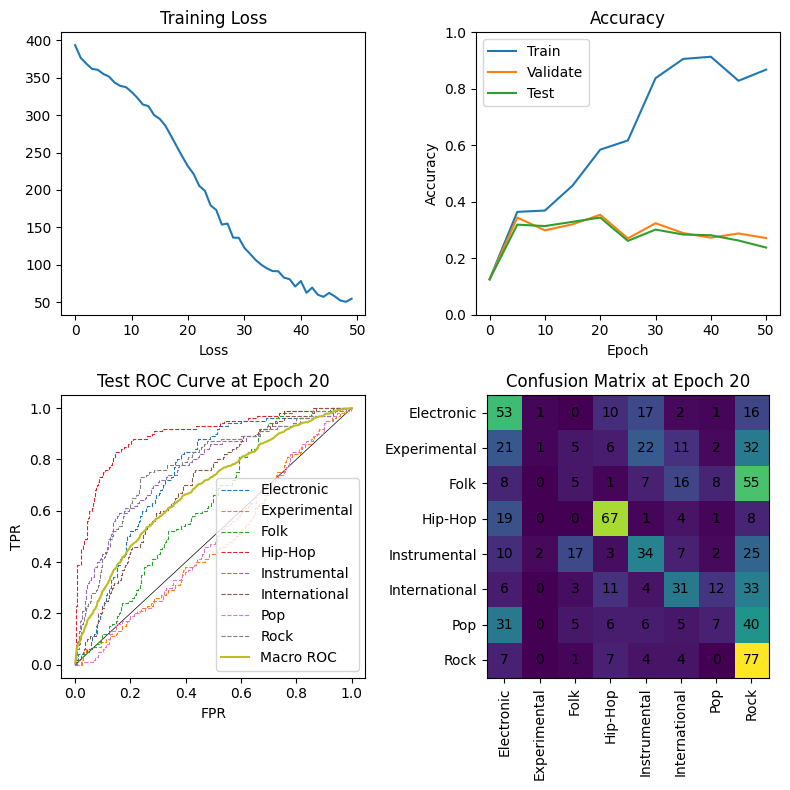

In [73]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)

In [74]:
model = cnn_models.ChromaCNNSquare().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [75]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_square_chroma_stft/epoch_0.pth
0min 8.7s, EPOCH 5/50, Loss: 356.98, Total time: 8.67, Transfer time: 0.586, Train time: 6.763
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_square_chroma_stft/epoch_5.pth
0min 17.3s, EPOCH 10/50, Loss: 327.02, Total time: 8.63, Transfer time: 0.584, Train time: 6.712
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_square_chroma_stft/epoch_10.pth
0min 26.0s, EPOCH 15/50, Loss: 299.12, Total time: 8.669, Transfer time: 0.595, Train time: 6.734
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_square_chroma_stft/epoch_15.pth
0min 34.7s, EPOCH 20/50, Loss: 254.69, Total time: 8.659, Transfer time: 0.589, Train time: 6.734
Saved model state as /content/drive/My Drive/machine_learning/pths/chroma_cnn_square_chroma_stft/epoch_20.pth
0min 43.5s, EPOCH 25/50, Loss: 213.84, Total time: 8.789, Transf

Evaluating pths for epochs:  0 (0min 1.2s), 5 (0min 2.4s), 10 (0min 3.7s), 15 (0min 4.9s), 20 (0min 6.1s), 25 (0min 7.4s), 30 (0min 8.6s), 35 (0min 9.8s), 40 (0min 11.1s), 45 (0min 12.3s), 50 (0min 13.5s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.8943 at epoch 40
Maximum validate accuracy: 0.3562 at epoch 10
Maximum test accuracy: 0.3413 at epoch 25

AT EPOCH 25
Macro Test AUC: 0.6889, Accuracy: 0.3413

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.7214, Accuracy of 0.44
 - Experimental: AUC of 0.4283, Accuracy of 0.02
 - Folk: AUC of 0.7067, Accuracy of 0.06
 - Hip-Hop: AUC of 0.9012, Accuracy of 0.68
 - Instrumental: AUC of 0.7256, Accuracy of 0.25
 - International: AUC of 0.6954, Accuracy of 0.43
 - Pop: AUC of 0.5512, Accuracy of 0.11
 - Rock: AUC of 0.7729, Accuracy of 0.74


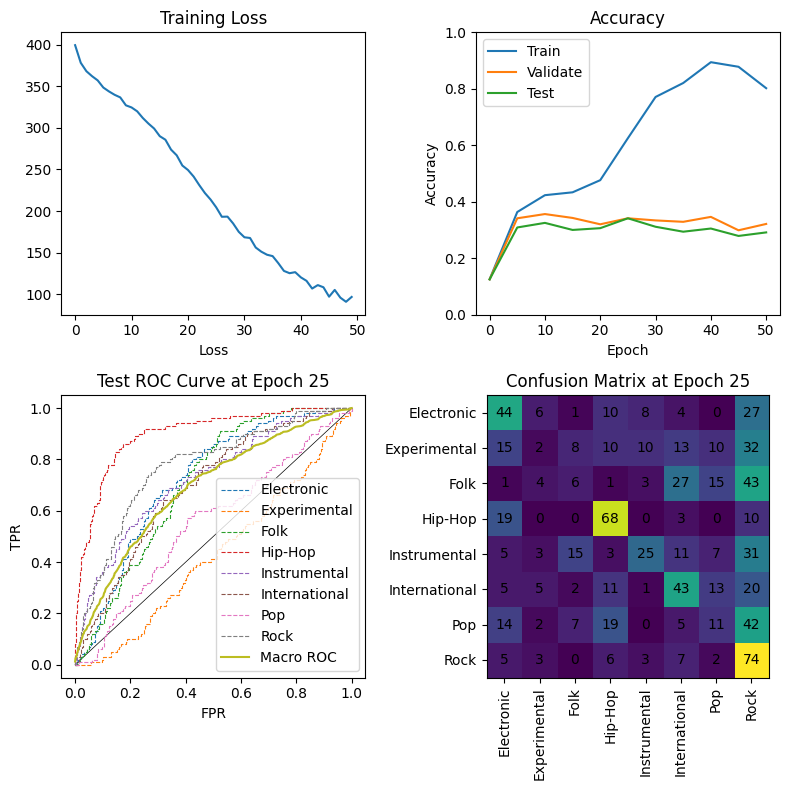

In [76]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)